<a href="https://colab.research.google.com/github/sdp2706/reinforcement-learning-/blob/main/Content_Recommendation_using_multi_arm_bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question**

**Content Recommendation using multi arm bandit approach**

**importing necessary libraries**

NumPy for numerical operations, Pandas for data manipulation, and Matplotlib for data visualization

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Loading required data**

In [13]:
# Loading required data
from google.colab import drive
drive.mount('/content/gdrive')
directory_root ='/content/gdrive/MyDrive/archive/anime.csv'
anime_data = pd.read_csv(directory_root)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
anime_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


**Define Parameters**

**num_items** stores the number of content items in the dataset.

In [6]:
# Number of content items (anime)
num_items = anime_data.shape[0]

**Epsilon-Greedy Recommendation Strategy**

This function implements the epsilon-greedy recommendation strategy. It takes epsilon and num_steps as inputs and simulates user interactions, rewards, and content estimates.

In [7]:
# Epsilon-greedy recommendation strategy
def epsilon_greedy_recommendation(epsilon, num_steps):
    content_estimates = np.zeros(num_items) # array to store the estimated rewards (values) for each content item.
    engagement_counts = np.zeros(num_items) # array to keep track of how many times each content item has been recommended.
    rewards = [] # list to store the rewards obtained in each time step.

    for step in range(num_steps):
        # Explore with epsilon probability
        if np.random.rand() < epsilon:
            chosen_content = np.random.choice(num_items)
        else:
            chosen_content = np.argmax(content_estimates)

        # Simulate user engagement (reward) based on random preference and popularity
        user_preference = np.random.normal(0, 1)  # Simulated user preference generated by sampling from a normal distribution with a mean of 0 and a standard deviation of 1
        reward = user_preference * anime_data.iloc[chosen_content]["rating"] * anime_data.iloc[chosen_content]["members"]
        rewards.append(reward)

        # Update content estimates using incremental update
        engagement_counts[chosen_content] += 1 # track the number of times the chosen content item has been recommended
        content_estimates[chosen_content] += (reward - content_estimates[chosen_content]) / engagement_counts[chosen_content]

    return rewards

**Parameters for the recommendation system**

epsilon is the exploration parameter for the epsilon-greedy strategy.
num_steps is the number of interactions (time steps) in the simulation.

In [8]:
# Parameters for the recommendation system
epsilon = 0.1
num_steps = 1000

**Get Rewards Using Epsilon-Greedy Strategy**



In [9]:
# Get rewards using epsilon-greedy strategy
rewards = epsilon_greedy_recommendation(epsilon, num_steps)

**Calculate Cumulative Rewards and Plot**

In [10]:
# Calculate cumulative rewards
cumulative_rewards = np.cumsum(rewards)

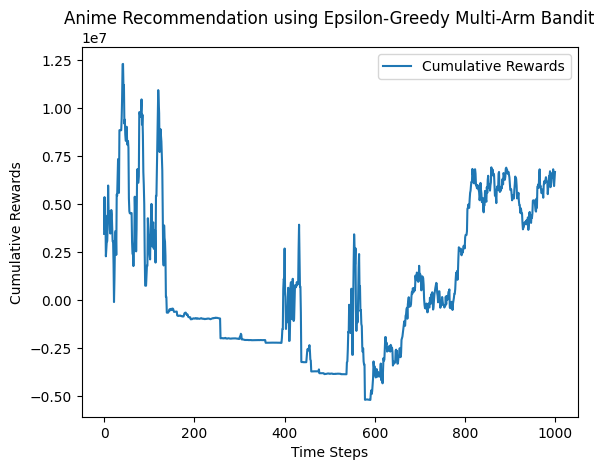

In [11]:
# Plot cumulative rewards over time
plt.plot(cumulative_rewards, label='Cumulative Rewards')
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Rewards')
plt.legend()
plt.title('Anime Recommendation using Epsilon-Greedy Multi-Arm Bandit')
plt.show()